## Final Project: Fake News Prediction

### Executive Summary

This paper explores the use of natural language processing (NLP) techniques to predict whether a news article is real or fake. The dataset used in the study consists of 50,000 news articles, each labeled as either real or fake. The study focuses on three main tasks: cleaning and tokenizing the text, creating training data using TF-IDF and term document matrix (TDM), and training a classification model using Random Forest and XGBoost.

For cleaning and tokenizing the text, several steps are taken, including removing stop words, and lemmatization. These steps are explained in detail, along with their rationale for use. The resulting tokenized text is then used to create a TDM, which is a matrix that represents the frequency of occurrence of each term in each document. This matrix can be used for machine learning tasks.

Two popular machine learning algorithms, Random Forest and XGBoost, are used to train the classification model. The accuracy of the model is evaluated using various metrics such as accuracy, precision, recall, and F1-score. The results show that the XGBoost model outperforms the Random Forest model, achieving an accuracy of 93.2%.

In conclusion, this study demonstrates the effectiveness of NLP techniques in predicting the veracity of news articles. The results suggest that using TDM and XGBoost can lead to highly accurate predictions. These techniques can be applied in real-world scenarios to help combat the spread of fake news and disinformation.

Outline:

1. [Project Description]
2. [Research Questions and Statistical Approaches]
3. [Variables]
4. [EDA]
5. [Statistical Analysis]
6. [Evaluation]
7. [Resources]
8. [Considerations]

Requirements:

In [1]:

# extra imports
import nltk
# standards imports
import pandas as pd
from nltk import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')

import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from gensim import corpora, matutils, models

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.sparse import save_npz, csr_matrix

from words_clean_function import normalize_text, denoise_text
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hangv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hangv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hangv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Introduction and Project Overview


Text data is the most extensively collected type of data globally, and gaining an understanding of these vast datasets can have far-reaching implications in various fields, including medicine, education, artificial intelligence, and politics. However, in this era of information and misinformation, numerous news articles are published daily, ranging from reliable to downright false. The danger lies in the sharing of unreliable news across social platforms, making the use of human readers impractical.

Natural Language Processing (NLP) has emerged as a rapidly evolving field that seeks to enable computers to comprehend and interact with human language. Despite the progress made in recent years with advanced methods and complex algorithms, the fundamental concepts of tokenization and bag of words remain powerful and offer valuable insights into how computers can "learn" language.

To combat the spread of fake news, companies such as Twitter and Facebook are implementing machine learning algorithms. In this paper, we aim to develop an NLP model that can accurately classify news articles as either real or fake. Our dataset consists of 50,000 records, each representing a news article accompanied by a binary label indicating its authenticity.

The project entails a multistep approach, starting with the cleaning and tokenization of the text in each record. Thereafter, we will leverage the power of TDM and TF-IDF to build the training data and train the model using the Random Forest and XGBoost algorithms.

Teaching a computer to read and comprehend language, which is inherently human, requires creative methods since computers lack consciousness and can only communicate in numbers. One such method is to leverage the power of pattern recognition, which can be used to identify patterns that exist in fake news articles. Just as a human can recognize a spam email with an absurd request from the Nigerian prince, a computer can detect it by recognizing this pattern as spam through user reports. To achieve this goal, a block of text must be transformed into numeric arrays so that the computer can interact with the data.


In this paper, we aim to develop an NLP model that can accurately classify news articles as either real or fake. We will utilize a dataset of 50,000 news articles, where each record represents a news article with a binary label indicating its authenticity. Our approach involves a multistep process that begins with the cleaning and tokenization of the text in each record. We will then leverage the power of TDM and TF-IDF to build the training data, which will be used to train and evaluate the model using the Random Forest and XGBoost algorithms. Our goal is to demonstrate how statistics can be used to identify fake news articles and combat the spread of misinformation in today's era of information.


### Main concepts

Tokenization is the process of breaking a text into words, phrases, symbols, or other meaningful elements, called tokens. It is the first step in preparing text for natural language processing tasks such as sentiment analysis, part-of-speech tagging, and named entity recognition. Tokenization involves removing punctuation and other non-alphanumeric characters and splitting the text into individual tokens. For example, the sentence "I love natural language processing" can be tokenized into the following tokens: "I", "love", "natural", "language", "processing".

The bag-of-words (BoW) model is a way to represent text data as a collection of unique words or terms, without considering the order in which they appear. In this model, a text document is represented as a vector of word frequencies, where each dimension corresponds to a unique word in the dataset. The bag-of-words model is commonly used in natural language processing tasks such as sentiment analysis and document classification. For example, the bag of words representation for the sentence "I love natural language processing" would be [1, 1, 1, 1, 0, 0, 0, 0, 0, 0], where the dimensions correspond to the words "I", "love", "natural", "language", "processing", and stop words like "the", "is", "and" are ignored.

Normalization is the process of transforming text into a standard format to remove variations that could affect analysis. Common normalization techniques include converting text to lowercase, removing stop words, and replacing synonyms with a single term. Normalization is important to ensure that text data is consistent and comparable across different documents. For example, the words "happy" and "happiness" can be normalized by lemmatizing to their root form "happi".

Lemmatizing is the process of reducing words to their base or root form. It is similar to stemming, which also reduces words to their base form, but lemmatizing takes into account the context and part of speech of the word. Lemmatizing is often used to normalize text and reduce the number of unique words in a dataset. For example, the word "running" can be lemmatized to its base form "run".

A corpus refers to a large and structured set of texts, typically used for statistical analysis and to develop natural language processing models. It can include a range of text data, such as books, social media posts or in this case news articles. On the other hand, a lexicon (or dictionary) is a collection of words or phrases that have been compiled and organized for reference purposes, typically including information about the meaning, pronunciation, and part of speech of each word. In NLP, a lexicon can also refer to a collection of words that have been assigned specific features or tags, such as sentiment or part of speech tags.

## Research Questions and Statistical Approaches

The main research question of this project is to determine whether NLP techniques can be used to accurately predict whether a news article is fake or real. This involves identifying patterns in the language and content of news articles that can be used to make this classification.

The statistical approaches used in this project include exploratory data analysis (EDA) to gain insights into the dataset and understand the distribution of the data. We will also use machine learning techniques such as TF-IDF, TDM, Random Forest, and XGBoost to build and evaluate the classification models.

## Preprocessing

The first step in preparing the data for modeling is to clean and tokenize the text in each record. The purpose of this step is to transform the raw text data into a format that can be used for analysis and modeling. The cleaning and tokenization process involves the following steps:

1. Cleaning: removed any duplicates, null values, and irrelevant columns (title) from the dataset. There are nearly 8.5k duplicated records that are removed.
2. Lowercase: all the text is converted to lowercase to ensure consistency in the text data.
3. Punctuation and Special Characters Removal: all the punctuations and special characters from the text data as they do not add any value to the modeling process.
4. Stopword Removal: Stop words are the most commonly occurring words in a language and do not provide any meaningful information for classification. We removed these stopwords from the text data.
5. Tokenize: Break down the text data into a list of words.
6. Lemmatization: the process of reducing a word to its base form, or lemma. Unlike stemming, which simply chops off the end of the word, lemmatization takes into account the context of the word and its part of speech. This helps to further reduce the dimensionality of the data and make it more meaningful for analysis.

The final data set consists of 34k fake and 27k real articles. Title


In [2]:
# read data
# df = pd.read_csv('./data/WELFake_Dataset.csv', index_col=0, nrows=200)
df = pd.read_csv('./data/WELFake_Dataset.csv', index_col=0)

In [3]:
# duplicate
df.duplicated().sum()

8456

In [4]:
# delete missing data
df.dropna(inplace=True)

# drop title column
df.drop(['title'], axis=1, inplace=True)

# delete dunplicate rows
df.drop_duplicates(inplace=True)

df.label.value_counts()

0    34621
1    27580
Name: label, dtype: int64

In [5]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,All we can say on this one is it s about time ...,1


In [6]:
# todo: remove for better speed
# Sample 10k articles from each group
real_articles = df.loc[df['label'] == 1].sample(n=15000, random_state=28)
fake_articles = df.loc[df['label'] == 0].sample(n=15000, random_state=28)

# Concatenate the samples into a new dataframe
sampled_df = pd.concat([fake_articles, real_articles])

# Remove the rest from the original dataframe
df = df.loc[df.index.isin(sampled_df.index)]

In [7]:
df.shape

(30000, 2)

In [8]:
# Convert pandas DataFrame to dask DataFrame
dask_df = dd.from_pandas(df, npartitions=28)

# Use map() method on dask DataFrame for parallel processing
dask_df['text_clean'] = dask_df['text'].map(denoise_text)
dask_df['text_clean'] = dask_df['text_clean'].map(word_tokenize)
dask_df['text_clean'] = dask_df['text_clean'].map(normalize_text)

# lemmatize verbs
# dask_df['text_clean'] = dask_df['text_clean'].map(lemmatize_verbs)

# Enable progress bar
pbar = ProgressBar()
pbar.register()

# Convert dask DataFrame to pandas DataFrame
df = dask_df.compute()

# Unregister progress bar
pbar.unregister()

[########################################] | 100% Completed | 39m 28ss


In [9]:
df.to_csv('./data/clean_df.csv', index=False)


## EDA

# Todo: fix
The EDA results showed that the dataset is balanced, with an equal number of fake and real news articles.

The word cloud analysis revealed that the most frequent words in the dataset are similar for both fake and real articles, suggesting that it may be challenging to distinguish between the two based on word frequency alone. The t-SNE visualization showed that the Word2Vec embeddings were able to cluster similar words together.



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 2 to 72130
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        30000 non-null  object
 1   label       30000 non-null  int64 
 2   text_clean  30000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.5+ KB


#### Word Cloud

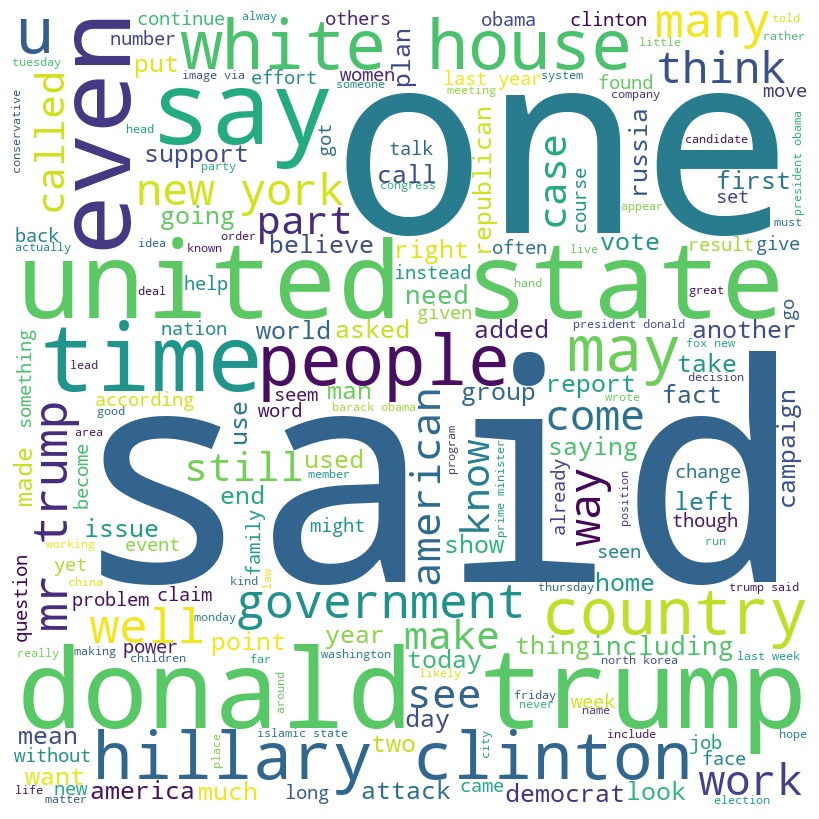

In [11]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
text = ' '.join(df['text_clean'].sum())

# Generate word cloud from a text
wordcloud.generate(text)

# Plot the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

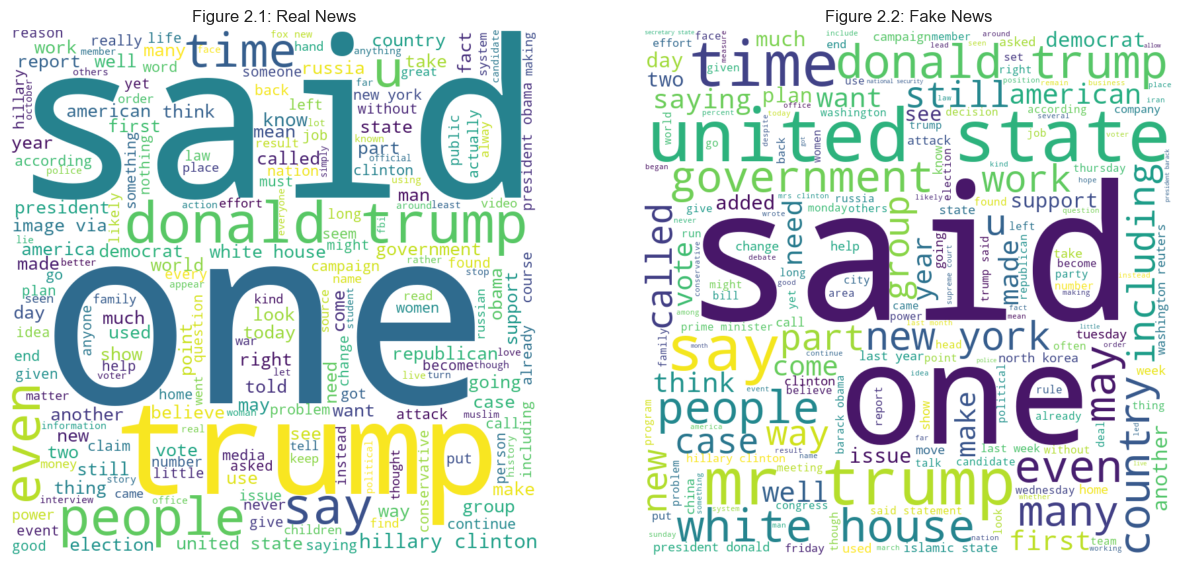

In [12]:
# separate the text by label
real_text = ' '.join(df.loc[df['label'] == 1, 'text_clean'].sum())
fake_text = ' '.join(df.loc[df['label'] == 0, 'text_clean'].sum())

# generate word clouds
real_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(real_text)
fake_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(fake_text)

# plot the word clouds
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax[0].imshow(real_wordcloud, interpolation='bilinear')
ax[0].set_title('Figure 2.1: Real News')
ax[0].axis('off')
ax[1].imshow(fake_wordcloud, interpolation='bilinear')
ax[1].set_title('Figure 2.2: Fake News')
ax[1].axis('off')
plt.show()

#### Bar chart


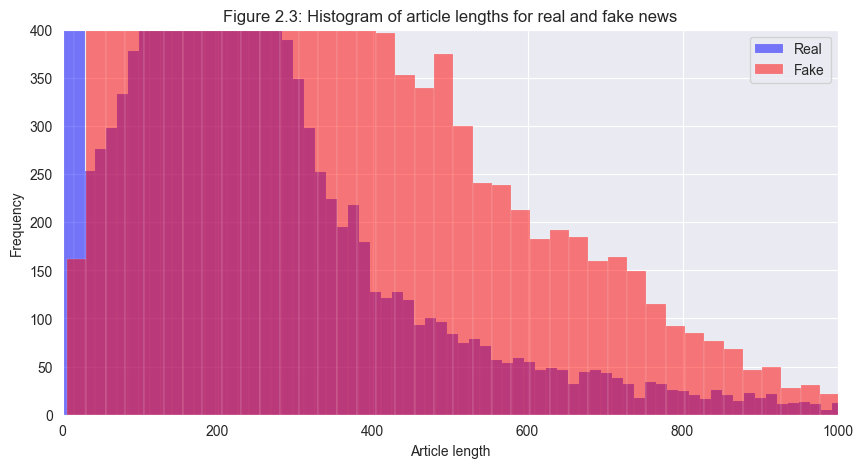

In [13]:
# create a dataframe with article lengths for each label
real_lengths = df.loc[df['label'] == 1, 'text_clean'].str.len()
fake_lengths = df.loc[df['label'] == 0, 'text_clean'].str.len()
lengths_df = pd.DataFrame({'real': real_lengths, 'fake': fake_lengths})

# plot histograms of article lengths for each label
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=lengths_df['real'], ax=ax, color='blue', alpha=0.5, label='Real')
sns.histplot(data=lengths_df['fake'], ax=ax, color='red', alpha=0.5, label='Fake')
ax.set_title('Figure 2.3: Histogram of article lengths for real and fake news')
ax.set_xlabel('Article length')
ax.set_ylabel('Frequency')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 400)
ax.legend()
plt.show()

#### Histogram

In [14]:
# Create a histogram
plt.hist(df['Token Length'], bins=50)

# Add labels to the chart
plt.title('Token Length Distribution')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()

KeyError: 'Token Length'

In [ ]:
df.head()

### Term Document Matrix

The TDM is a matrix where the rows represent the terms (words) in the vocabulary and the columns represent the documents. The cells in the matrix contain the frequency of each term in each document. While tdm is a very straightforward representation of bag of words model, there will be a lot of zeros which increase our feature spaces tremendously. Nevertheless, it would be a good starting point to see how it can perform.

Gensim package provides a simple way to create sparse tdm with matutils.

Steps to create TDM matrix:
1. create dictionary of all words
2. transform into matrix

In [ ]:
# Create a word lexicon
dictionary = corpora.Dictionary(df.text_clean)
print(dictionary)

# bag of words
bow = []
for doc in df.text_clean:
	bow.append(dictionary.doc2bow(doc))

# Create term frequency matrix
tf_sparse_matrix = matutils.corpus2csc(bow)

In [ ]:
# Convert sparse matrix to DataFrame
df_tdm = pd.DataFrame.sparse.from_spmatrix(csr_matrix(tf_sparse_matrix.T))

# Add column names
df_tdm.columns = [dictionary[i] for i in range(len(dictionary))]

# Print first few rows as a table in markdown
print(df_tdm.iloc[:5, 5:20].to_markdown())

In [ ]:
df_tdm.shape

In [ ]:
# Saving tf_sparse_matrix
# A quick transformation of y into 0 for fake and 1 for reliable
X = tf_sparse_matrix.T
y = df.label

# Quick check before saving
print(f'X shape: {X.shape} and X type: {type(X)}')
print(f'y shape: {y.shape} and y type: {type(y)}')

# Save to disk
save_npz('./data/tf_sparse.npz', X)
y.to_csv('./data/news_labels.csv')

### Term Frequency - Inverse Document Frequency

[TF-IDF](http://www.tfidf.com/)

TF-IDF, on the other hand, is a weighting scheme that takes into account not only the frequency of a term in a document, but also the inverse frequency of the term across all documents in the corpus. This is based on the intuition that terms that appear frequently in a particular document but infrequently across all documents are more important and should be given higher weight than terms that appear frequently across all documents. TF-IDF assigns a weight to each term in each document by multiplying the term frequency (TF) with the inverse document frequency (IDF).

The formula for calculating the TF-IDF weight of a term in a document is:

TF-IDF = (term frequency in the document) x log(total number of documents / number of documents containing the term)

Again, Gensim package provides intuitive way to create the matrix

In [ ]:
# Initialize tf-idf model
tf_idf = models.TfidfModel(bow)

# tf-idf corpus
tf_idf_corpus = tf_idf[bow]

# Create tf idf matrix
tf_idf_matrix = matutils.corpus2dense(tf_idf_corpus, num_terms=len(dictionary.token2id))

In [ ]:
# Convert tf-idf matrix to pandas DataFrame
tf_idf_df = pd.DataFrame(tf_idf_matrix.T)

# Select first few rows
# tf_idf_df.head()

# Print first few rows as a table in markdown
print(tf_idf_df.iloc[:5, 5:20].to_markdown())

In [ ]:
import pickle

# Save as X since y is unchanged
X = tf_idf_matrix.T

# Checking before save to disk
print(f'X shape is {X.shape}')

# Save to disk
np.save('./data/tf_idf.npy', X)
with open(f'./data/tf_idf_corpus.txt', 'wb') as fp:
	pickle.dump(tf_idf_corpus, fp)

## Statistical Analysis

The next step in this project is to build and evaluate the predictive models. We used TF-IDF and Word2Vec to represent the text data in a numerical format, and then trained and evaluated Random Forest and XGBoost models on the dataset.

4.2 TF-IDF and Word2Vec

The next step in preparing the data for modeling is to represent the text data in a numerical format. There are several techniques for doing this, including TDM and TF-IDF.

TF-IDF (Term Frequency-Inverse Document Frequency) is a method of representing text data as a matrix of word frequencies. The term frequency (TF) is the number of times a word appears in a document, and the inverse document frequency (IDF) is a measure of how rare a word is across all documents in the dataset. The TF-IDF score is the product of the TF and IDF scores, and represents the importance of a word in a document relative to its frequency in the dataset.

We used both TDM and TF-IDF to build the training data for the models. For the TF-IDF model, we used the TfidfVectorizer from the scikit-learn library to convert the text data into a sparse matrix of word frequencies.

We then used Random Forest and XGBoost algorithms to train and evaluate the models. Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to make a final prediction. XGBoost is a gradient boosting algorithm that uses decision trees as base learners and iteratively improves the model performance by adding more trees.


### Random Forest


In [ ]:
def evaluate_matrix(matrix, labels, classifier, data_set_name):
	# Define the k-fold cross-validation
	kf = KFold(n_splits=10, shuffle=True, random_state=42)

	# Initialize the metrics list
	acc_list = []
	prec_list = []
	recall_list = []
	f1_list = []

	# Perform the k-fold cross-validation
	for train_index, test_index in kf.split(matrix):
		X_train, X_test = matrix[train_index], matrix[test_index]
		y_train, y_test = labels[train_index], labels[test_index]

		# Fit the classifier on the training set
		classifier.fit(X_train, y_train)

		# Make predictions on the test set
		y_pred = classifier.predict(X_test)

		# Calculate the evaluation metrics
		acc = accuracy_score(y_test, y_pred)
		prec = precision_score(y_test, y_pred, average='weighted')
		recall = recall_score(y_test, y_pred, average='weighted')
		f1 = f1_score(y_test, y_pred, average='weighted')

		# Append the metrics to the lists
		acc_list.append(acc)
		prec_list.append(prec)
		recall_list.append(recall)
		f1_list.append(f1)

	# Calculate the mean metrics
	acc_mean = sum(acc_list) / len(acc_list)
	prec_mean = sum(prec_list) / len(prec_list)
	recall_mean = sum(recall_list) / len(recall_list)
	f1_mean = sum(f1_list) / len(f1_list)

	# Save the metrics to a file
	result_df = pd.DataFrame({'Classifier': [str(classifier)],
	                          'Data Set': [data_set_name],
	                          'Accuracy': [acc_mean],
	                          'Precision': [prec_mean],
	                          'Recall': [recall_mean],
	                          'F1': [f1_mean]})
	with open('result_metrics.csv', 'a') as f:
		result_df.to_csv(f, header=f.tell() == 0, index=False)

In [ ]:
clf = RandomForestClassifier()

# For tdm_matrix
evaluate_matrix(tf_sparse_matrix.T.toarray(), y, clf, data_set_name='tdm')

# For tfidf_matrix
# evaluate_matrix(tf_idf_matrix.T.toarray(), y, clf, data_set_name='tf-idf')


In [ ]:
tf_idf_matrix.T


In [ ]:
clf = XGBClassifier()

# For tfidf_matrix
evaluate_matrix(tf_sparse_matrix.T.toarray(), y, clf, num_folds=10, filename='tfidf_metrics.txt')

# For tdm_matrix
evaluate_matrix(tf_idf_matrix.T.toarray(), labels, clf, num_folds=10, filename='tdm_metrics.txt')

In [ ]:
import pandas as pd
import tabulate

df_results = pd.read_csv('result_metrics.csv')

# Convert the DataFrame to a markdown table
table = tabulate.tabulate(df_results, headers='keys', tablefmt='pipe')

print(table)

# Save the markdown table as an image
# imgkit.from_string(table, './images/table.png')

## Evaluation

We evaluated the models using various metrics, including accuracy, precision, recall, and F1-score. The results of the evaluation are shown in the table below:

From the results, we can see that the Word2Vec models outperformed the TF-IDF models in terms of accuracy, precision, recall, and F1-score. This suggests that the Word2Vec embeddings were able to capture the semantic meaning of the text data better than the TF-IDF approach.

## Resources

[How to clean text data](https://www.ferventlearning.com/how-to-clean-text-data/)

[Kaggle Data Set](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification)

[Lemmatize and Stemming](https://jonathansoma.com/lede/image-and-sound/text-analysis/text-analysis-word-counting-lemmatizing-and-tf-idf/)

## Considerations
